# Programming Assignmen 2

### Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

In [3]:
import numpy as np
from matplotlib import pylab as plt
from scipy import optimize

### Задача 1: Минимизация гладкой функции

на промежутке [1, 30]

In [28]:
def f(x): 
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [9]:
x_dots = list(range(1, 31))
y_dots = [f(x) for x in x_dots]

In [37]:
optimize.minimize(f, 30,  method = 'Nelder-Mead')

 final_simplex: (array([[ 25.88021851],
       [ 25.88012695]]), array([-11.89889467, -11.89889466]))
           fun: -11.898894665788275
       message: 'Optimization terminated successfully.'
          nfev: 34
           nit: 17
        status: 0
       success: True
             x: array([ 25.88021851])

In [55]:
bfgs_2 = optimize.minimize(f, 2, method = 'BFGS')
bfgs_30 = optimize.minimize(f, 30, method="BFGS")

In [71]:
out = [round(bfgs_2.fun, 2), round(bfgs_30.fun, 2)]
out

[1.75, -11.9]

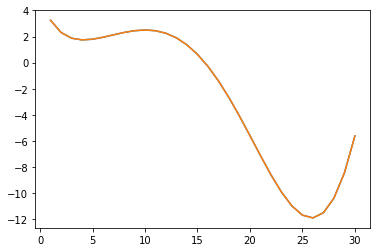

In [52]:
plt.plot(x_dots, y_dots)
plt.show()

In [59]:
with open("ass2_subm1.txt", "w") as subm:
    subm.write(" ".join(str(i) for i in out))

### Задача 2: Глобальная оптимизация

In [86]:
out_ev = optimize.differential_evolution(f, [(1, 30)])
out_ev

     fun: array([-11.89889467])
     jac: array([ 0.])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 5
 success: True
       x: array([ 25.88019343])

In [83]:
out = str(round(out_ev.fun[0], 2))
out

'-11.9'

In [82]:
with open("ass2_subm2.txt", "w") as subm:
    subm.write(out)

### Задача 3: Минимизация негладкой функции

In [87]:
h = lambda x: int(f(x))

In [89]:
y_hdots = [h(x) for x in x_dots]

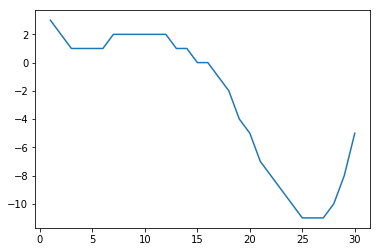

In [90]:
plt.plot(x_dots, y_hdots)
plt.show()

In [99]:
out_bfgs = optimize.minimize(h, 30, method = "BFGS")

-5

In [101]:
out_ev = optimize.differential_evolution(h, [(1, 30)])

In [102]:
out_3 = [out_bfgs.fun, out_ev.fun]

In [103]:
out_3

[-5, -11.0]

In [104]:
with open("ass2_subm3.txt", "w") as subm:
    subm.write(" ".join(str(i) for i in out_3))